In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

In [11]:
df = pd.read_parquet( "data\online_retail.gzip")
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [13]:
df.shape

(541909, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


In [19]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.689453
std,218.081158,96.759853,1713.600342
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [25]:
df.describe?

Signature: df.describe(percentiles=None, include=None, exclude=None) -> 'Self'
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included in the output.
    - A list-like of dtypes : Limits the r

In [21]:
df.describe(exclude="number")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,1114,2313,2369,1114,495478


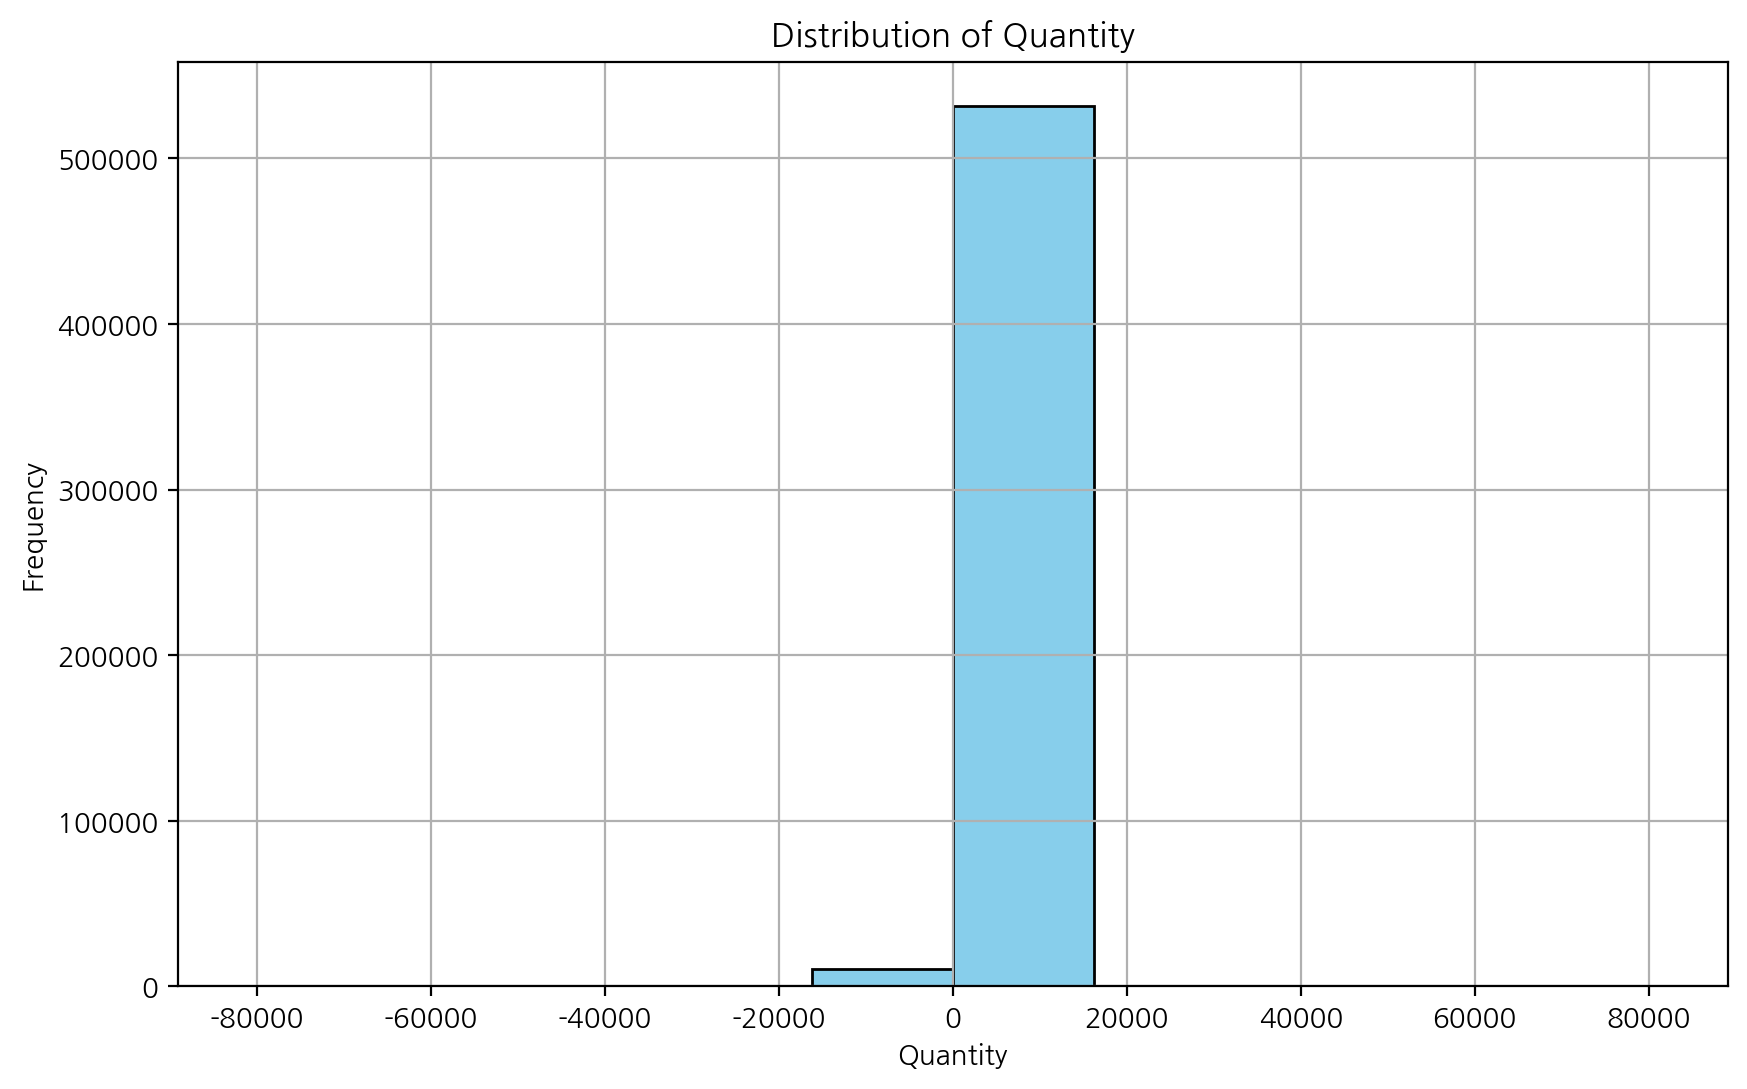

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df["Quantity"], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

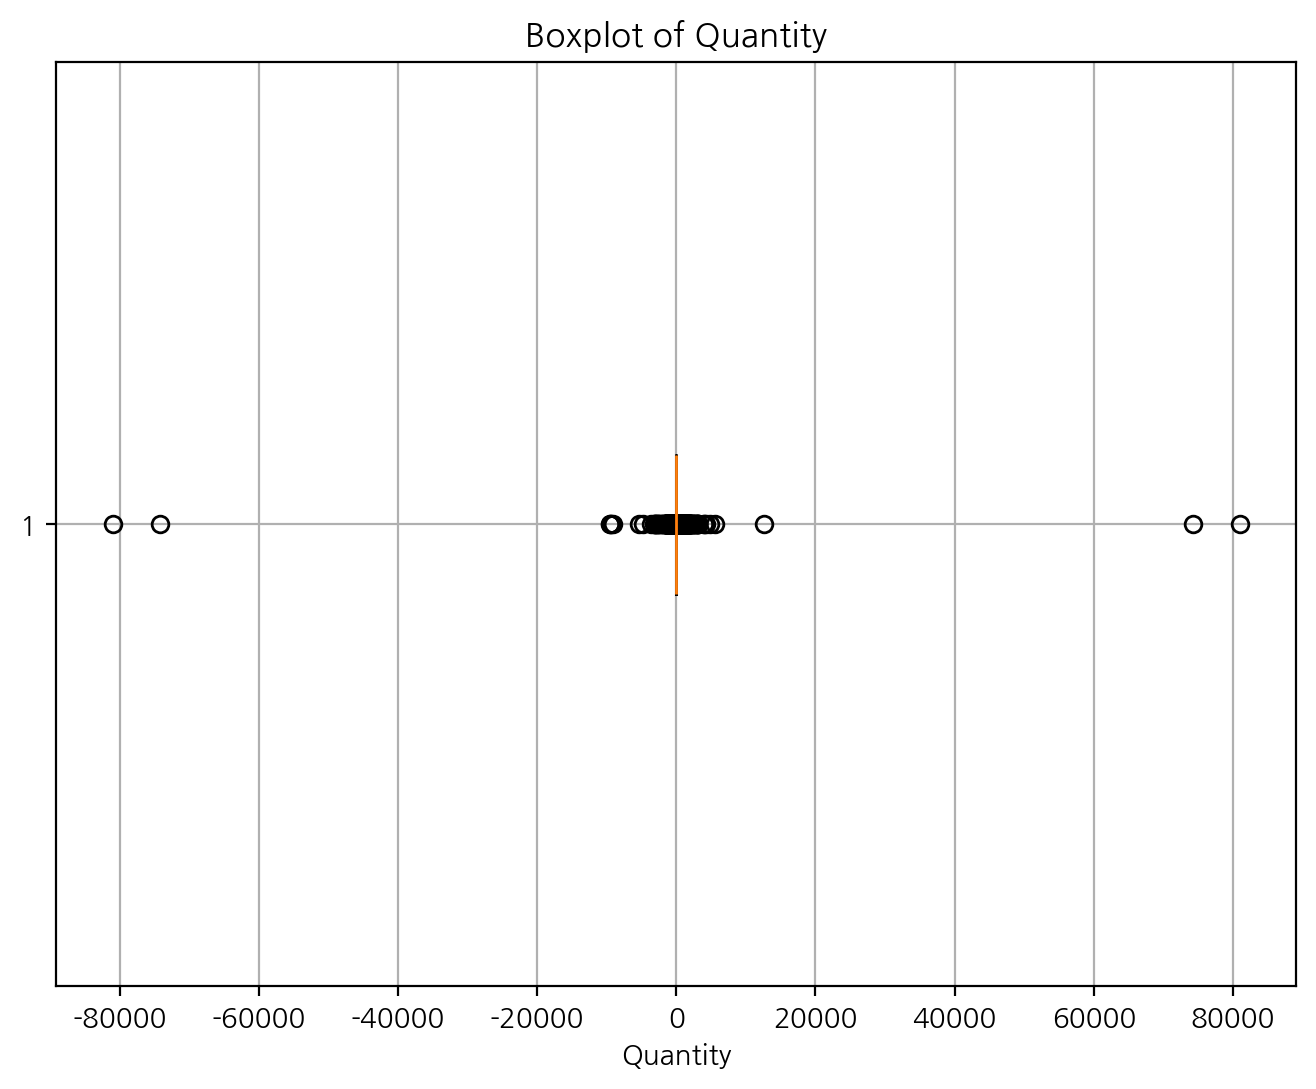

In [23]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["Quantity"], vert=False)
plt.title("Boxplot of Quantity")
plt.xlabel("Quantity")
plt.grid(True)
plt.show()

In [ ]:
df.isnull().sum()
#CustomerID 결측치가 왜 많을까? / 비회원주문? 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [30]:
df.isnull().mean() * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

<Axes: >

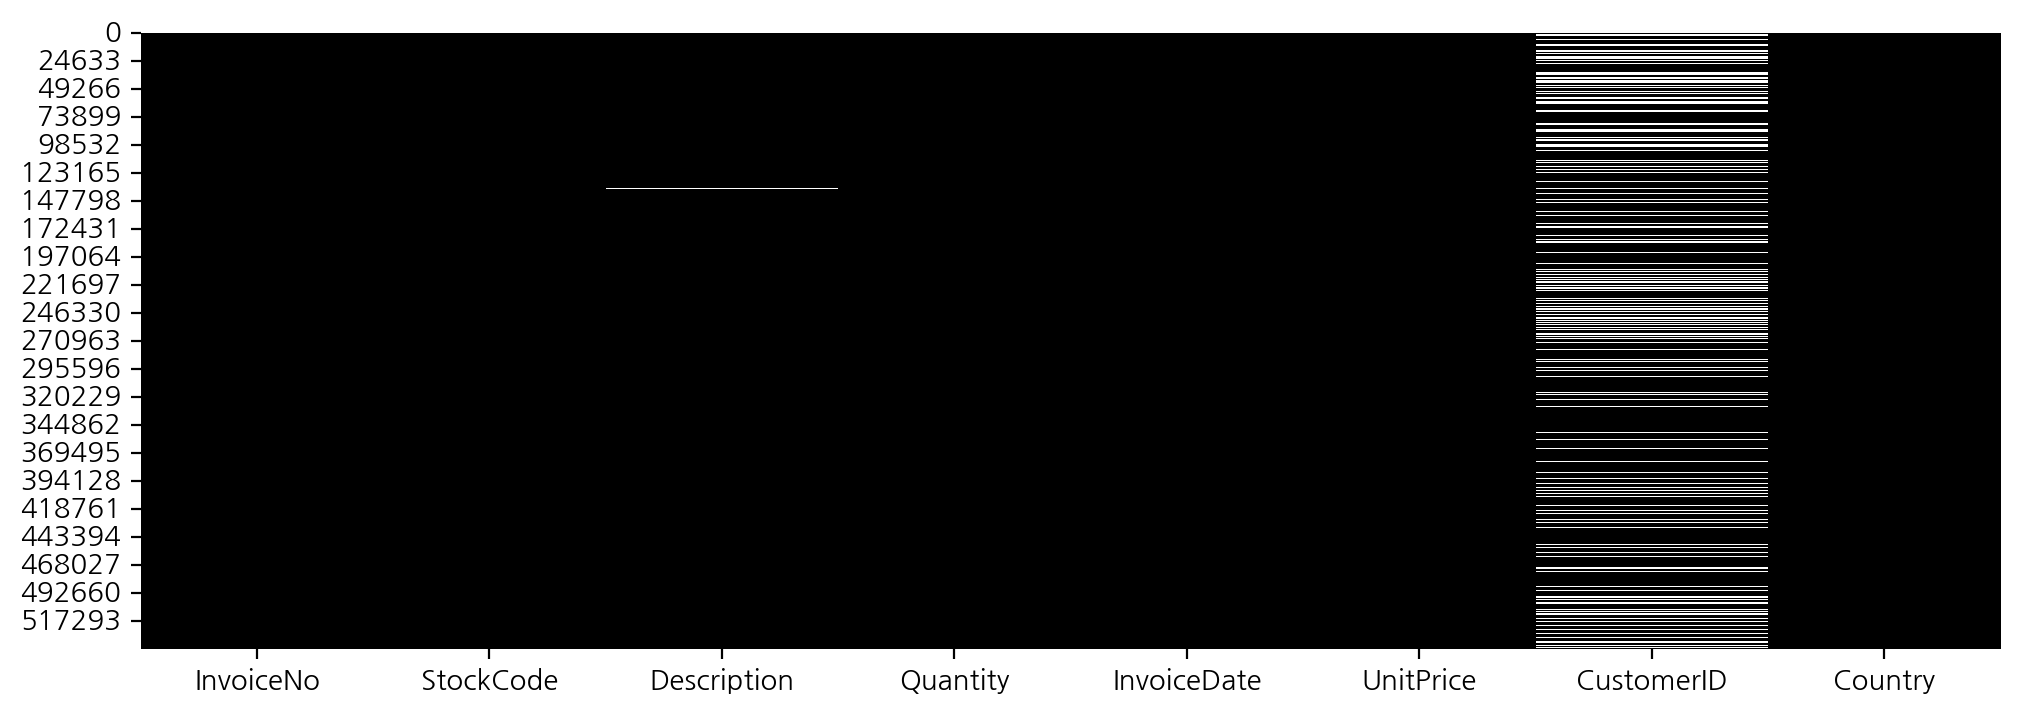

In [33]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False, cmap='gray')



array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

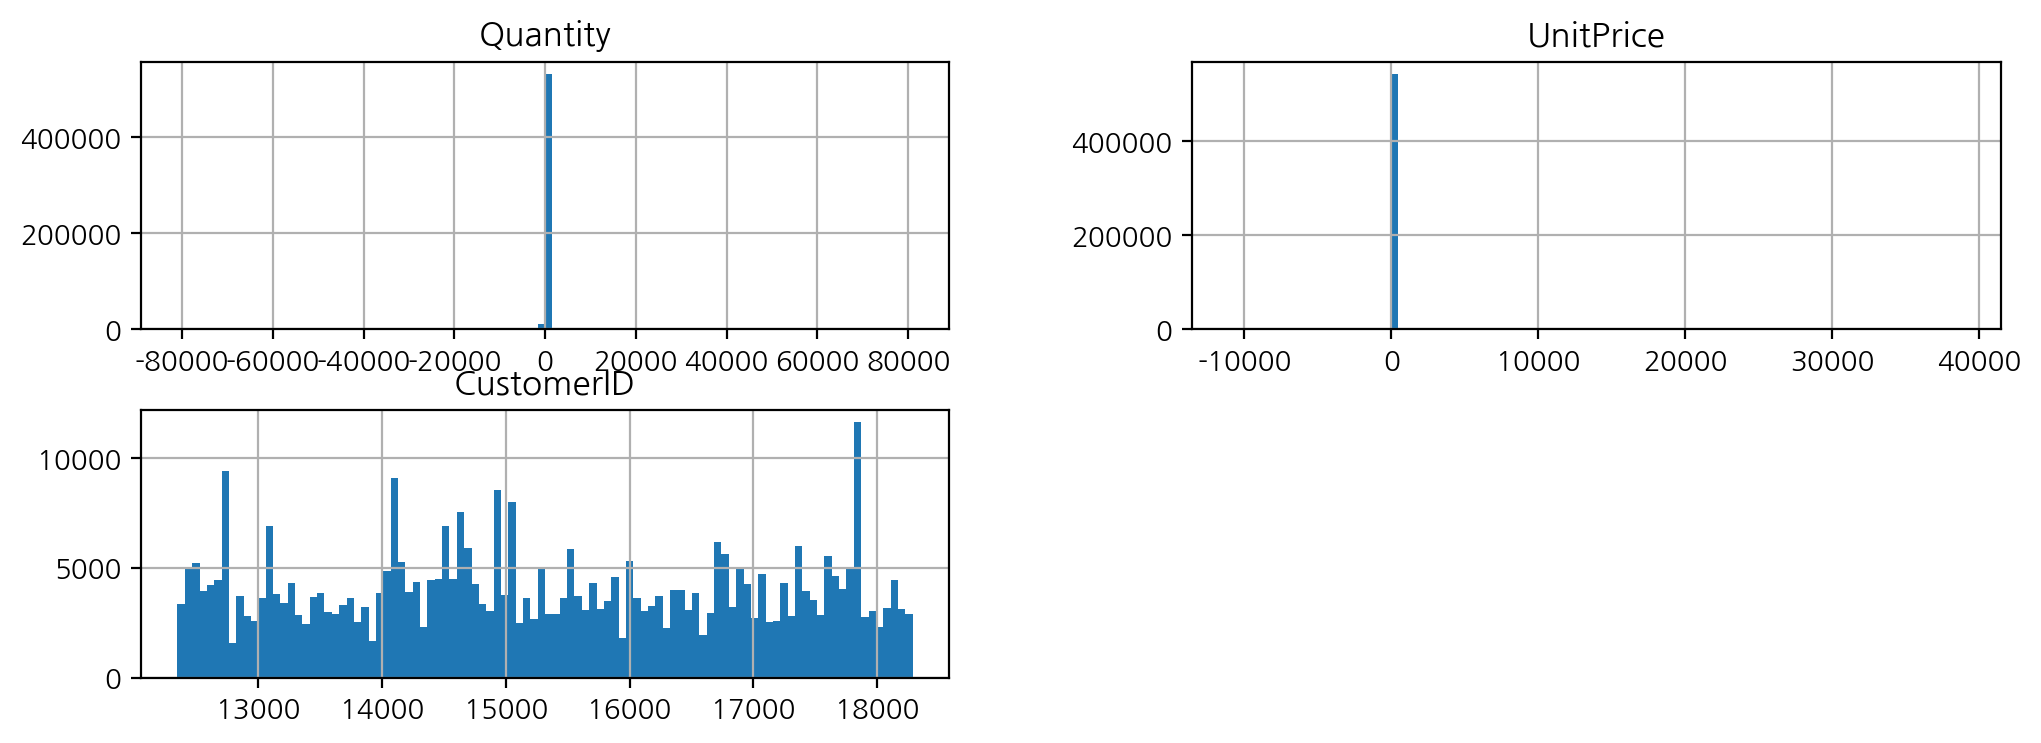

In [37]:
df.hist(figsize=(12,4),bins=100)

In [38]:
#전체 주문금액 
#TotalPrice 는 RFM중 Frequency에 해당하는 값이다.
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df["TotalPrice"].describe()

count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: TotalPrice, dtype: float64

In [40]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


### 회원 vs 비회원구매

In [41]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [49]:
df['CustomerID'].isnull().value_counts()

CustomerID
False    406829
True     135080
Name: count, dtype: int64

In [ ]:
df['CustomerID'].isnull().value_counts(normalize=True)
#결측치 빈도수수

CustomerID
False    0.750733
True     0.249267
Name: proportion, dtype: float64

In [54]:
df.loc[df['CustomerID'].notnull(),"Country"].value_counts()
#CustomerID 가 결측치인 주문은 어떤 주문인가?

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [56]:
df.loc[df['CustomerID'].isnull(),"Country"].value_counts()

Country
United Kingdom          133600
EIRE                       711
Hong Kong                  288
Unspecified                202
Switzerland                125
France                      66
Israel                      47
Portugal                    39
Bahrain                      2
Canada                       0
Australia                    0
Brazil                       0
Belgium                      0
Austria                      0
Finland                      0
European Community           0
Greece                       0
Germany                      0
Denmark                      0
Czech Republic               0
Channel Islands              0
Cyprus                       0
Lebanon                      0
Japan                        0
Italy                        0
Iceland                      0
Norway                       0
Lithuania                    0
Netherlands                  0
Malta                        0
Saudi Arabia                 0
RSA                          0


In [ ]:
df['isRegistered'] = df['CustomerID'].notnull()
df.head()
# 회원주문과 비회원 주문을 구분하기 위한 컬럼을 추가

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True


In [ ]:
pd.crosstab(df['Country'],df['isRegistered']).sort_values(True,ascending=False)

isRegistered,False,True
Country,,
United Kingdom,133600,361878
Germany,0,9495
France,66,8491
EIRE,711,7485
Spain,0,2533
Netherlands,0,2371
Belgium,0,2069
Switzerland,125,1877
Portugal,39,1480


In [64]:
country_crosstab=pd.crosstab(df['Country'], df['isRegistered'], margins=True, margins_name="Total", normalize='index') * 100
#국가별 비회원 주문 비율
# 비회원 주문이 많은 국가는? -> USA, France, Germany, Netherlands, Belgium

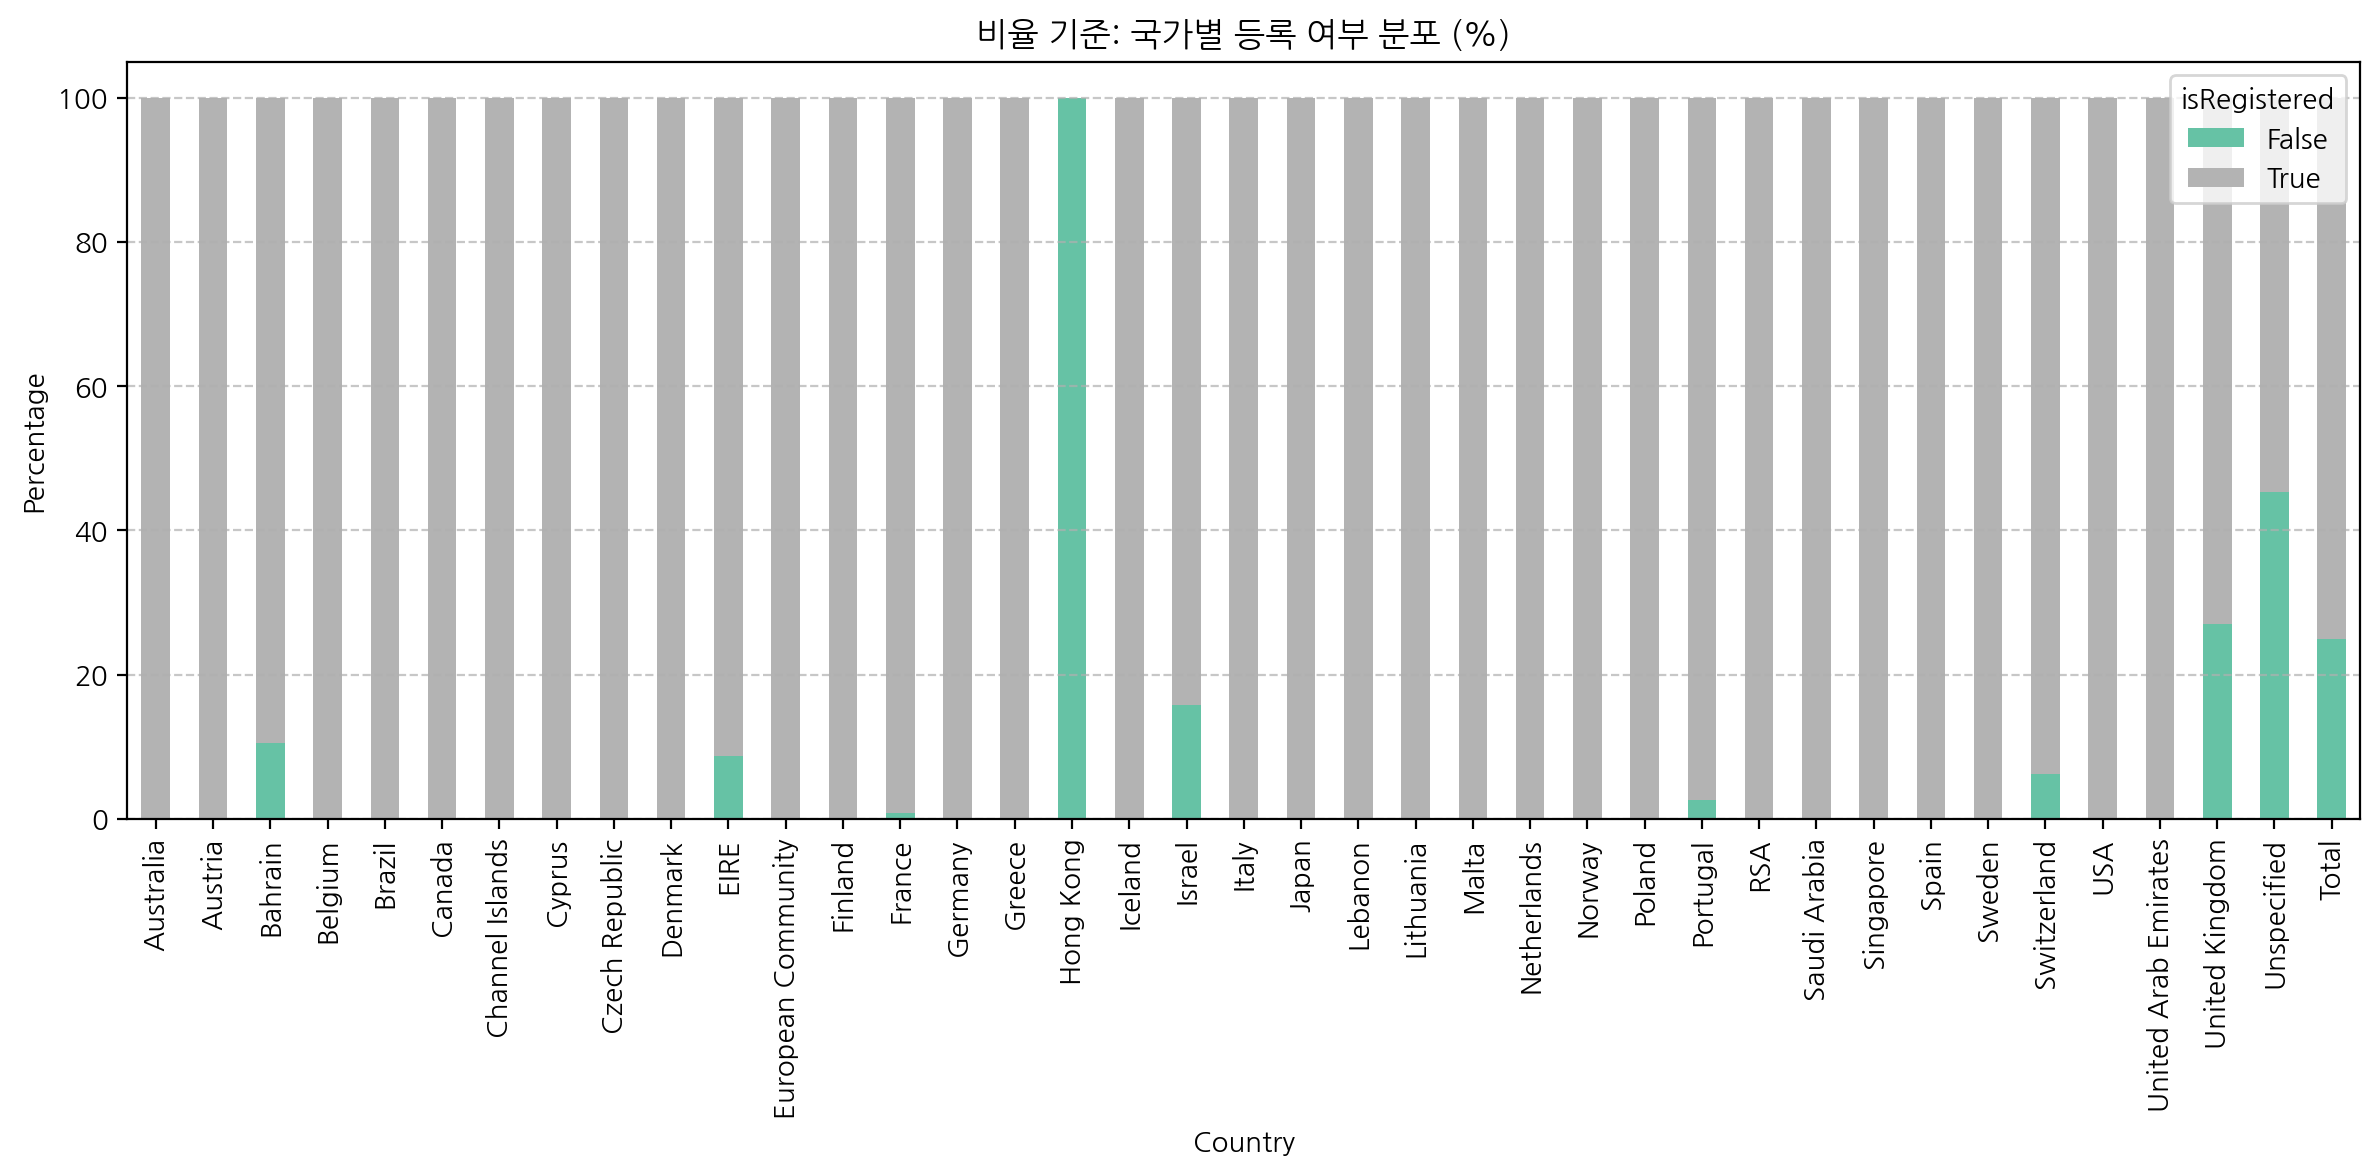

In [73]:
country_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

plt.title("비율 기준: 국가별 등록 여부 분포 (%)")
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.legend(title="isRegistered", loc="upper right")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.show()

### 구매취소비율

In [77]:
df['InvoiceNo'].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C581100       1
C581323       1
C581162       1
536380        1
536374        1
Name: count, Length: 25900, dtype: int64

In [78]:
df['InvoiceCode']=df['InvoiceNo'].str.replace("[0-9]","",regex=True)
df['InvoiceCode'].value_counts()

InvoiceCode
     532618
C      9288
A         3
Name: count, dtype: int64

In [79]:
df["isCanclel"] = (df["InvoiceCode"] == "C")

In [81]:
pd.crosstab(df['isRegistered'],df['InvoiceCode'])

InvoiceCode,,A,C
isRegistered,,,
False,134694,3,383
True,397924,0,8905


In [92]:
df[df['StockCode']=='B']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCanclel
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06,False,A,False
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06,False,A,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06,False,A,False


In [82]:
df[df["InvoiceCode"] == "A"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCanclel
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06,False,A,False
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06,False,A,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06,False,A,False


### 고객별 취소

In [106]:
customer_cancel = pd.crosstab(df['CustomerID'],df['isCanclel'])
customer_cancel.columns=['정상','취소']
customer_cancel['취소비율'] = customer_cancel['취소'] / (customer_cancel['정상'] + customer_cancel['취소']) * 100
customer_cancel

,정상,취소,취소비율
CustomerID,,,
12346.0,1,1,50.000000
12347.0,182,0,0.000000
12348.0,31,0,0.000000
12349.0,73,0,0.000000
12350.0,17,0,0.000000
...,...,...,...
18280.0,10,0,0.000000
18281.0,7,0,0.000000
18282.0,12,1,7.692308


In [ ]:
customer_cancel.nlargest(10,'취소')

,정상,취소,취소비율
CustomerID,,,
14911.0,5677,226,3.828562
17841.0,7847,136,1.703620
17511.0,963,113,10.501859
15311.0,2379,112,4.496186
12607.0,101,101,50.000000
14410.0,194,93,32.404181
13798.0,349,90,20.501139
14606.0,2700,82,2.947520
13113.0,201,79,28.214286


In [100]:
df.groupby(['CustomerID','isCanclel'])['InvoiceNo'].count().unstack()

isCanclel,False,True
CustomerID,,
12346.0,1.0,1.0
12347.0,182.0,NaN
12348.0,31.0,NaN
12349.0,73.0,NaN
12350.0,17.0,NaN
...,...,...
18280.0,10.0,NaN
18281.0,7.0,NaN
18282.0,12.0,1.0


### 특정 고객의 구매 건 조회

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'TotalPrice'}>]], dtype=object)

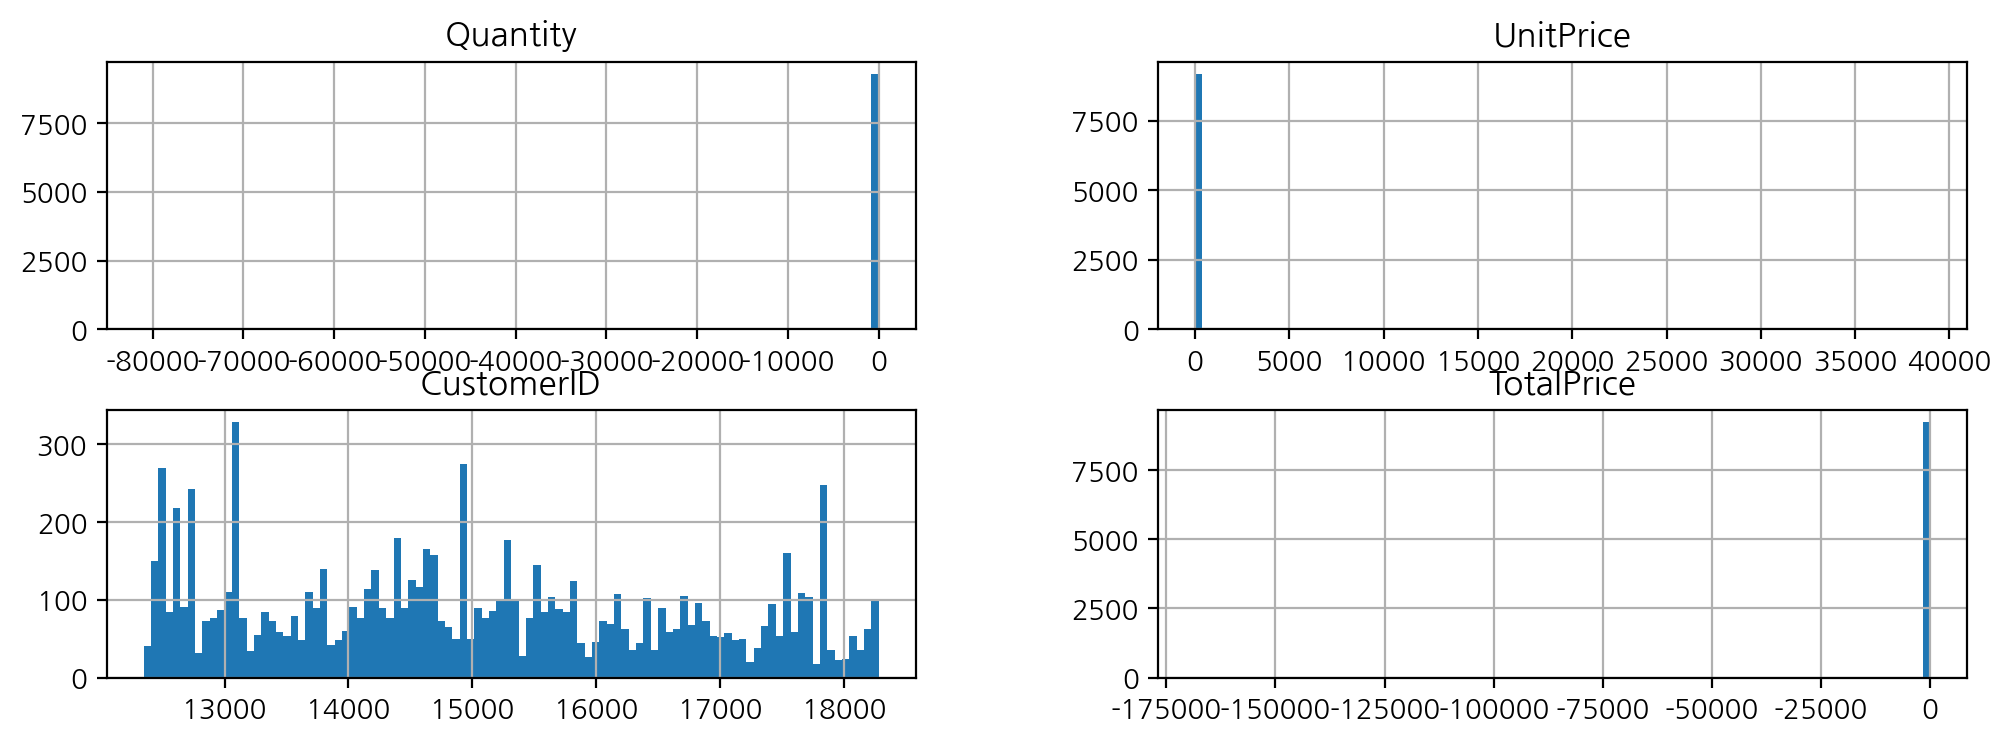

In [110]:
df[df['InvoiceCode'] =='C'].hist(figsize=(12,4),bins=100)

In [111]:
df[df['InvoiceCode'] =='C'].describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,9288.000000,9288.000000,8905.000000,9288.000000
mean,-29.885228,48.393661,14991.666992,-96.556039
std,1145.786965,666.600430,1706.772339,2039.905511
min,-80995.000000,0.010000,12346.000000,-168469.600000
25%,-6.000000,1.450000,13510.000000,-17.700000
50%,-2.000000,2.950000,14895.000000,-8.500000
75%,-1.000000,5.950000,16393.000000,-3.700000
max,-1.000000,38970.000000,18282.000000,-0.120000


In [113]:
df[df['CustomerID'] ==14911]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCanclel
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE,39.8,True,,False
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE,17.7,True,,False
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE,15.3,True,,False
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE,42.5,True,,False
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE,13.5,True,,False
...,...,...,...,...,...,...,...,...,...,...,...,...
539151,581433,22192,BLUE DINER WALL CLOCK,2,2011-12-08 15:54:00,8.50,14911.0,EIRE,17.0,True,,False
539152,581433,48187,DOORMAT NEW ENGLAND,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,True,,False
539153,581433,48184,DOORMAT ENGLISH ROSE,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,True,,False
539154,581433,20685,DOORMAT RED RETROSPOT,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,True,,False


### 제품별 구매 취소 비율

In [115]:
df['StockCode'].value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
40018F       1
16053        1
10134        1
10123G       1
m            1
Name: count, Length: 4070, dtype: int64

In [122]:
stock_cancel = pd.crosstab(df['StockCode'],df['isCanclel'])

In [133]:
df_stock_desc = df[['StockCode','Description']].drop_duplicates('StockCode').dropna().set_index('StockCode')

In [136]:
df_stock_desc

,Description
StockCode,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
71053,WHITE METAL LANTERN
84406B,CREAM CUPID HEARTS COAT HANGER
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...
85179a,GREEN BITTY LIGHT CHAIN
23617,SET 10 CARDS SWIRLY XMAS TREE 17104
90214U,"LETTER ""U"" BLING KEY RING"


In [135]:
df[['StockCode','Description']].drop_duplicates('StockCode').dropna()

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
509369,85179a,GREEN BITTY LIGHT CHAIN
512588,23617,SET 10 CARDS SWIRLY XMAS TREE 17104
527065,90214U,"LETTER ""U"" BLING KEY RING"
537224,47591b,SCOTTIES CHILDRENS APRON


In [141]:
stock_cancel = stock_cancel.join(df_stock_desc)
#merge , join , columns 추가방법으로 가능능

In [142]:
stock_cancel.columns

Index([False, True, 'Description'], dtype='object')

In [143]:
stock_cancel.columns=['정상','취소','설명']

In [145]:
stock_cancel.nlargest(10,'정상')

,정상,취소,설명
StockCode,,,
85123A,2271,42,WHITE HANGING HEART T-LIGHT HOLDER
85099B,2115,44,JUMBO BAG RED RETROSPOT
22423,2022,181,REGENCY CAKESTAND 3 TIER
47566,1707,20,PARTY BUNTING
20725,1595,44,LUNCH BAG RED RETROSPOT
84879,1490,12,ASSORTED COLOUR BIRD ORNAMENT
22197,1426,50,SMALL POPCORN HOLDER
22720,1403,74,SET OF 3 CAKE TINS PANTRY DESIGN
21212,1370,15,PACK OF 72 RETROSPOT CAKE CASES


### 고객id가 없는 주문과 취소 주문은 전체 데이터에서 제외
- 취소와 취소에 대한 본 주문건 제거
- 고객id가 없는 건도 제거

In [146]:
df.shape

(541909, 12)

In [ ]:
df['CustomerID'].notnull()
df.loc[df['Quantity']<0,'InvoiceCode'].value_counts()
#취소된 주문번호별로 몇 개의 품목이 반품됐는지 ?

InvoiceCode
C    9288
     1336
Name: count, dtype: int64

In [162]:
df.loc[(df['Quantity'] <0 ) & (df['InvoiceCode'] != 'C'),'Description'].value_counts()

Description
check                                120
damages                               45
damaged                               42
?                                     41
sold as set on dotcom                 20
                                    ... 
6 RIBBONS ELEGANT CHRISTMAS            0
6 RIBBONS EMPIRE                       0
wrongly sold (22719) barcode           0
6 RIBBONS RUSTIC CHARM                 0
TREE T-LIGHT HOLDER WILLIE WINKIE      0
Name: count, Length: 4223, dtype: int64

In [161]:
df.loc[(df['Quantity'] <0 ) & (df['InvoiceCode'] != 'C'),'Description'].value_counts()[lambda x: x ==0]

Description
6 RIBBONS SHIMMERING PINKS             0
6 ROCKET BALLOONS                      0
60 CAKE CASES DOLLY GIRL DESIGN        0
60 CAKE CASES VINTAGE CHRISTMAS        0
60 GOLD AND SILVER FAIRY CAKE CASES    0
                                      ..
6 RIBBONS ELEGANT CHRISTMAS            0
6 RIBBONS EMPIRE                       0
wrongly sold (22719) barcode           0
6 RIBBONS RUSTIC CHARM                 0
TREE T-LIGHT HOLDER WILLIE WINKIE      0
Name: count, Length: 4085, dtype: int64

In [ ]:
df.loc[(df['Quantity'] <0 ) & (df['InvoiceCode'] != 'C'),'Quantity'].describe()
#다 음수로 되어 있음. 수량이 -이기에  그냥 제거하고 진행하자

count    1336.000000
mean     -154.907934
std       588.292456
min     -9600.000000
25%       -84.000000
50%       -30.000000
75%        -8.000000
max        -1.000000
Name: Quantity, dtype: float64

In [167]:
df.loc[df['UnitPrice'] < 0,'InvoiceCode'].value_counts()

InvoiceCode
A    2
Name: count, dtype: int64

In [169]:
df[(df['CustomerID'].notnull()) &(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCanclel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,True,,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,True,,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False


In [ ]:
df.loc[(df['CustomerID'].notnull()) &(df['Quantity'] > 0) & (df['UnitPrice'] > 0),'InvoiceCode'].value_counts()
#취소값이 더이상 없는것같다.

InvoiceCode
    397884
Name: count, dtype: int64

In [175]:
df_valid = df.loc[(df['CustomerID'].notnull()) &(df['Quantity'] > 0) & (df['UnitPrice'] > 0)].copy()
df.shape , df_valid.shape

((541909, 12), (397884, 12))

In [ ]:
df_valid = df_valid.drop_duplicates().copy()
df_valid.shape
#중복제거거

(392692, 12)

### 날짜와 시간

In [180]:
df_valid['InvoiceDate']=pd.to_datetime(df_valid['InvoiceDate'])

In [182]:
df_valid['InvoiceDate'].dt.year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 392692, dtype: int32

In [187]:
df_valid['InvoiceYear'] = df_valid['InvoiceDate'].dt.year
df_valid['InvoiceMonth'] = df_valid['InvoiceDate'].dt.month
df_valid['InvoiceDay'] = df_valid['InvoiceDate'].dt.day
df_valid['InvoiceDow'] = df_valid['InvoiceDate'].dt.dayofweek

In [189]:
df_valid.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCanclel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,True,,False,2010,12,1,2


In [210]:
df_valid['InvoiceYM'] = df_valid['InvoiceDate'].astype(str).str[:7]

In [191]:
df_valid.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCanclel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,True,,False,2010,12,1,2,2010-12


In [192]:
df_valid[['InvoiceDate','InvoiceYM']].sample(3)

,InvoiceDate,InvoiceYM
212954,2011-06-05 10:41:00,2011-06
247849,2011-07-04 10:20:00,2011-07
84987,2011-02-08 12:20:00,2011-02


In [198]:
df_valid['InvoiceTime']=df_valid['InvoiceDate'].dt.time
df_valid['InvoiceHour']=df_valid['InvoiceDate'].dt.hour
df_valid.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCanclel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,True,,False,2010,12,1,2,2010-12,08:26:00,8


array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'InvoiceDate'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'TotalPrice'}>,
        <Axes: title={'center': 'InvoiceYear'}>],
       [<Axes: title={'center': 'InvoiceMonth'}>,
        <Axes: title={'center': 'InvoiceDay'}>,
        <Axes: title={'center': 'InvoiceDow'}>],
       [<Axes: title={'center': 'InvoiceHour'}>, <Axes: >, <Axes: >]],
      dtype=object)

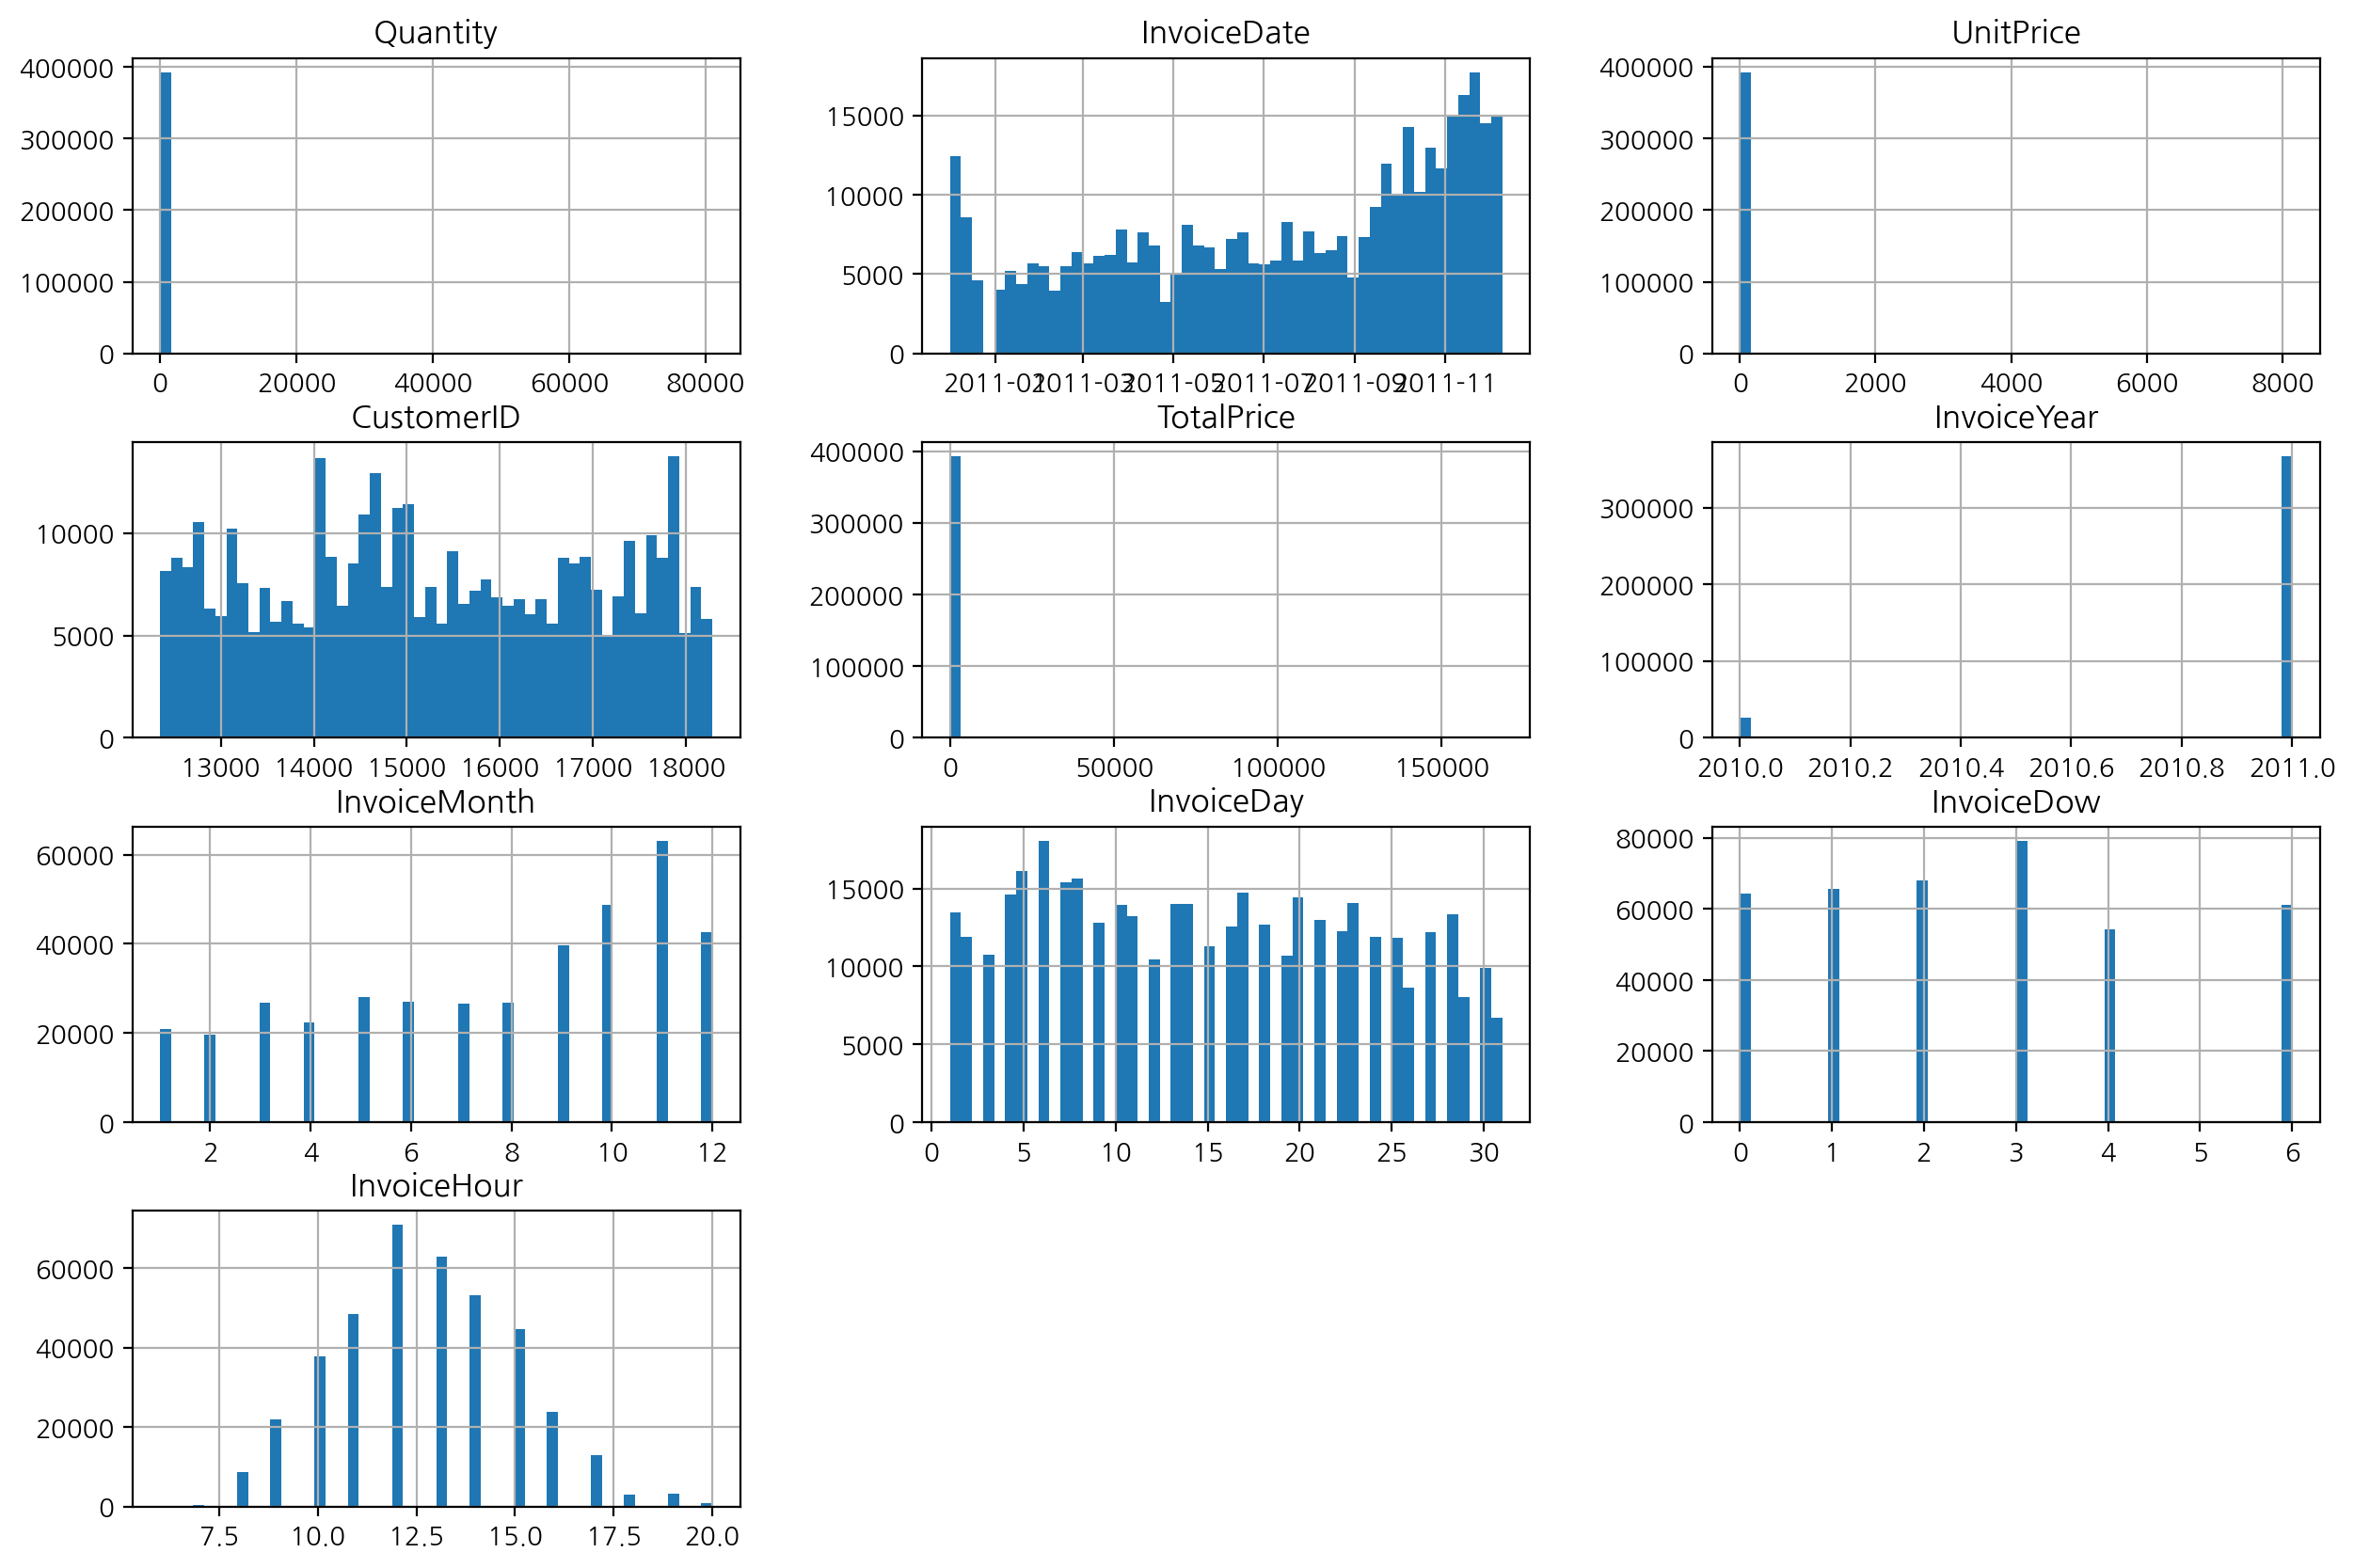

In [ ]:
df_valid.hist(figsize=(15,10),bins=50)
#Quantity랑 UnitPrice는 이상치가 있다.
#토요일 데이터가없다?


<Axes: xlabel='InvoiceMonth', ylabel='count'>

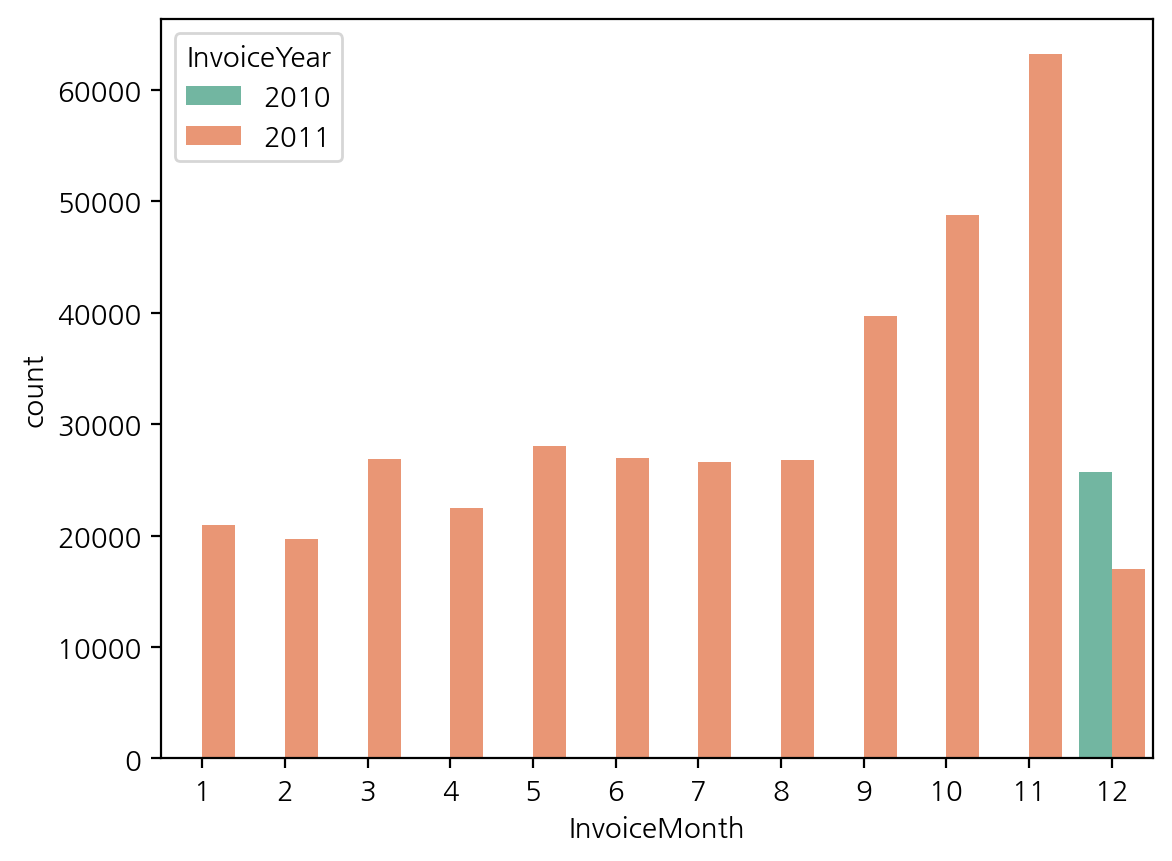

In [201]:
sns.countplot(data=df_valid, x='InvoiceMonth', hue='InvoiceYear', palette='Set2')

<Axes: xlabel='InvoiceYM', ylabel='count'>

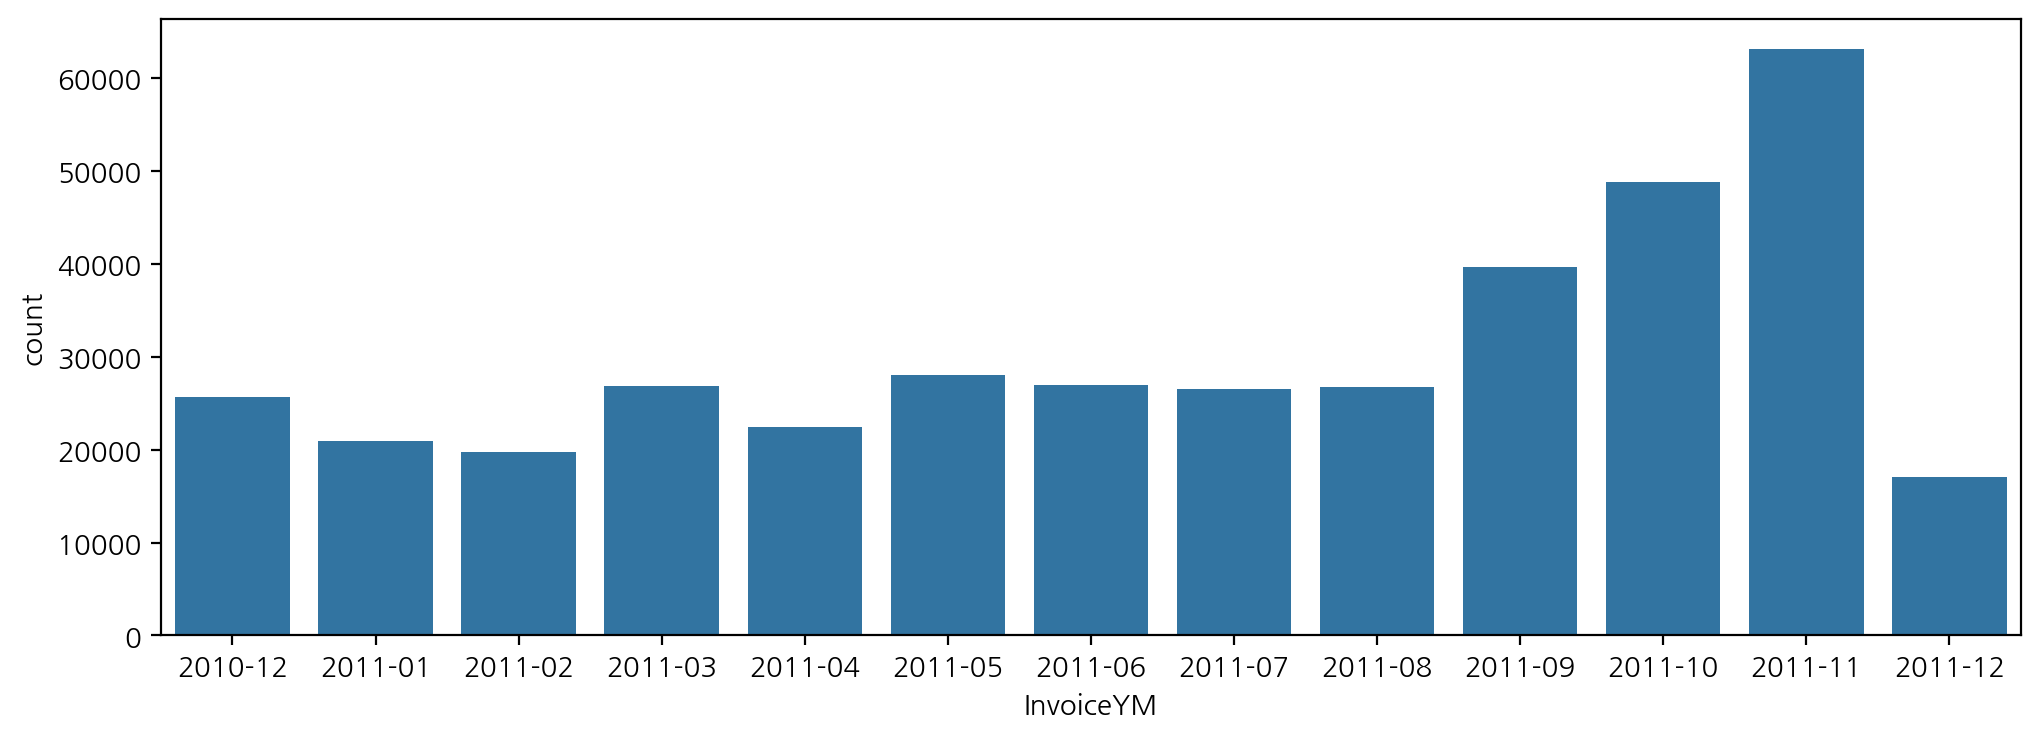

In [206]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df_valid, x='InvoiceYM')


In [215]:
df_valid[(df_valid['InvoiceYM'] =='2011-11')].sort_values('InvoiceDate', ascending=False).head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCanclel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,InvoiceHour
516368,579885,21259,VICTORIAN SEWING BOX SMALL,1,2011-11-30 17:37:00,5.95,15444.0,United Kingdom,5.95,True,,False,2011,11,30,2,2011-11,17:37:00,17


In [ ]:
df_valid[(df_valid['InvoiceYM'] =='2011-12')].sort_values('InvoiceDate', ascending=False)
#2011-12 수치가 왜 작아졌을까? 데이터셋에서의 2011-12월 day는 9일에서 끊겼다.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCanclel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,InvoiceHour
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,True,,False,2011,12,9,4,2011-12,12:50:00,12
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,15.60,True,,False,2011,12,9,4,2011-12,12:50:00,12
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80,True,,False,2011,12,9,4,2011-12,12:50:00,12
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80,True,,False,2011,12,9,4,2011-12,12:50:00,12
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00,True,,False,2011,12,9,4,2011-12,12:50:00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516411,579899,23129,HEART SHAPED HOLLY WREATH,4,2011-12-01 08:33:00,4.15,15687.0,United Kingdom,16.60,True,,False,2011,12,1,3,2011-12,08:33:00,8
516412,579899,22577,WOODEN HEART CHRISTMAS SCANDINAVIAN,24,2011-12-01 08:33:00,0.85,15687.0,United Kingdom,20.40,True,,False,2011,12,1,3,2011-12,08:33:00,8
516413,579899,22402,MAGNETS PACK OF 4 VINTAGE COLLAGE,24,2011-12-01 08:33:00,0.85,15687.0,United Kingdom,20.40,True,,False,2011,12,1,3,2011-12,08:33:00,8
516414,579899,22595,GINGHAM HEART DECORATION,24,2011-12-01 08:33:00,0.85,15687.0,United Kingdom,20.40,True,,False,2011,12,1,3,2011-12,08:33:00,8


### 요일별 빈도수

C:\Users\notypeboi\AppData\Local\Temp\ipykernel_8656\1183861229.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_valid, x='InvoiceDow', palette='Set2')


<Axes: xlabel='InvoiceDow', ylabel='count'>

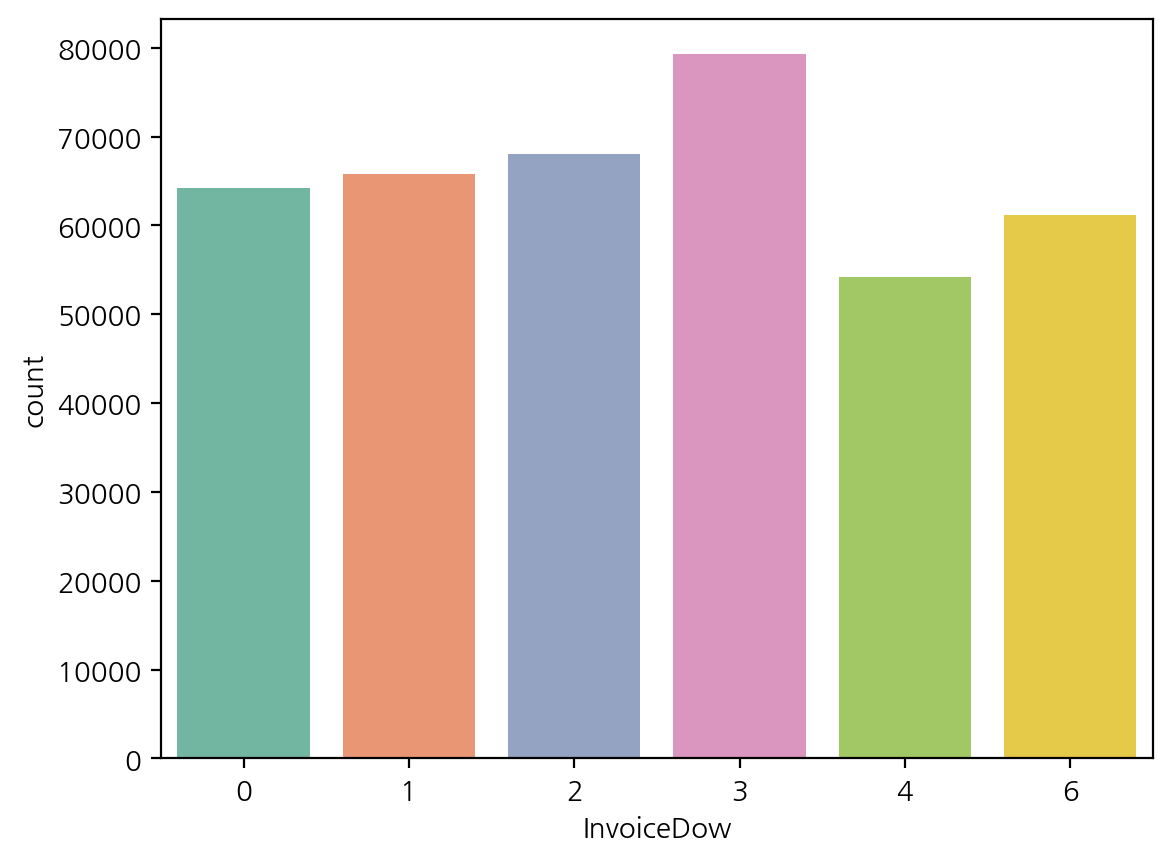

In [ ]:
sns.countplot(data=df_valid, x='InvoiceDow', palette='Set2')
#토요일이 없다.

In [221]:
day_name = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri',  'Sun']

In [223]:
dow_count = df_valid['InvoiceDow'].value_counts().sort_index()
dow_count.index = day_name
dow_count


Mon    64231
Tue    65744
Wed    68040
Thu    79243
Fri    54222
Sun    61212
Name: count, dtype: int64

<Axes: >

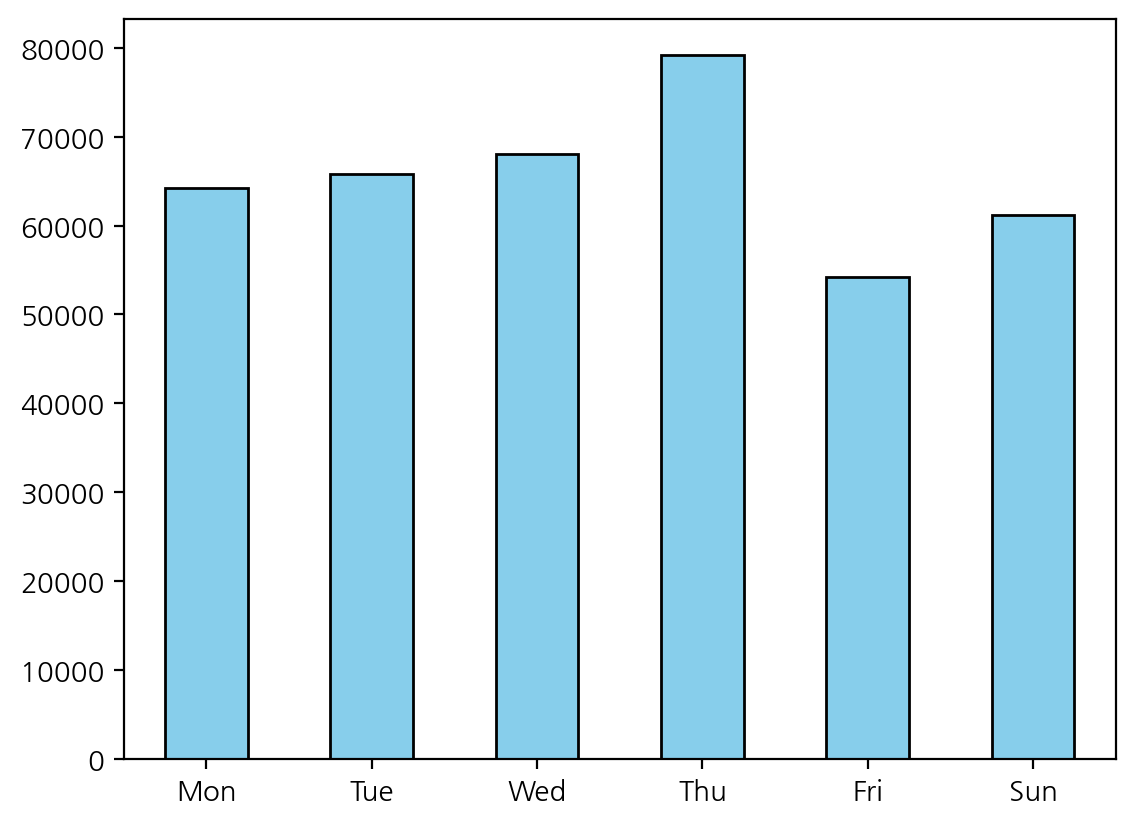

In [225]:
dow_count.plot(kind='bar', color='skyblue', edgecolor='black',rot =0)

C:\Users\notypeboi\AppData\Local\Temp\ipykernel_8656\2985202008.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_valid, x='InvoiceHour', palette='Set2')


<Axes: xlabel='InvoiceHour', ylabel='count'>

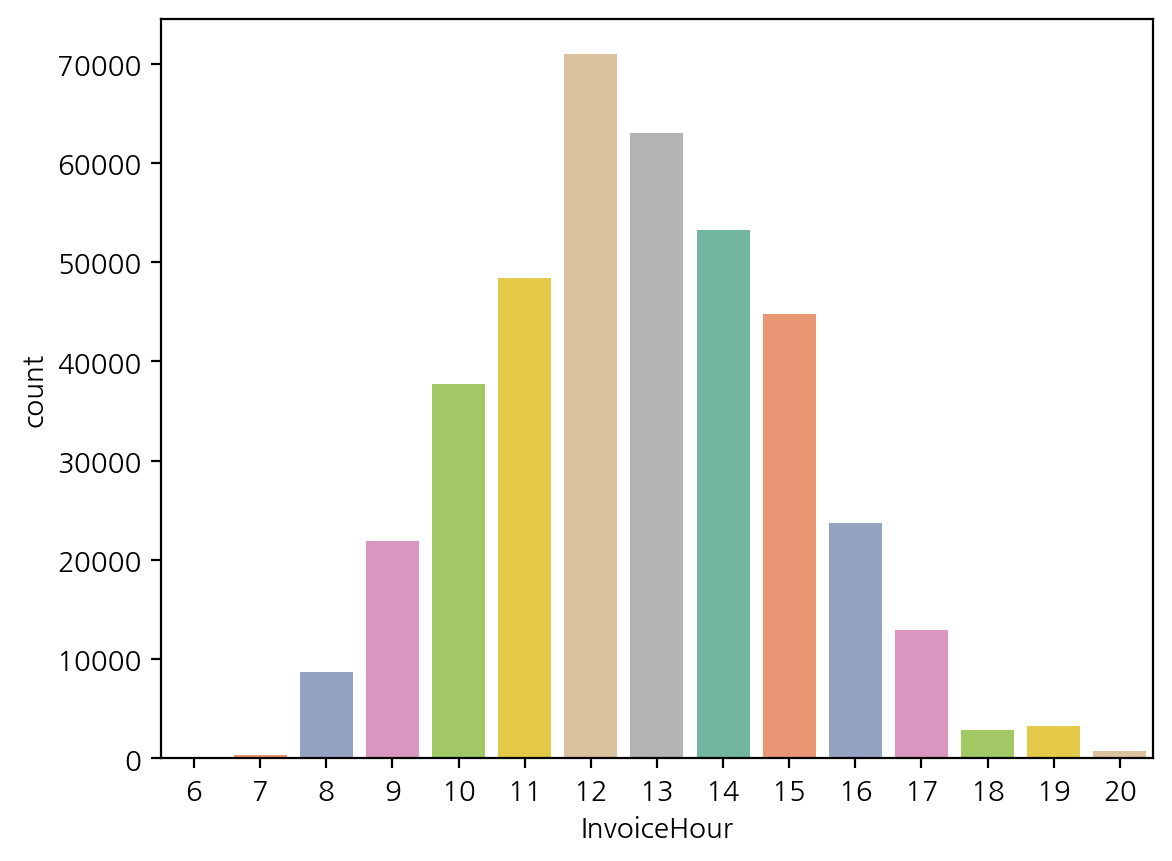

In [226]:
sns.countplot(data=df_valid, x='InvoiceHour', palette='Set2')

Text(0.5, 1.0, '시간대별 주문량')

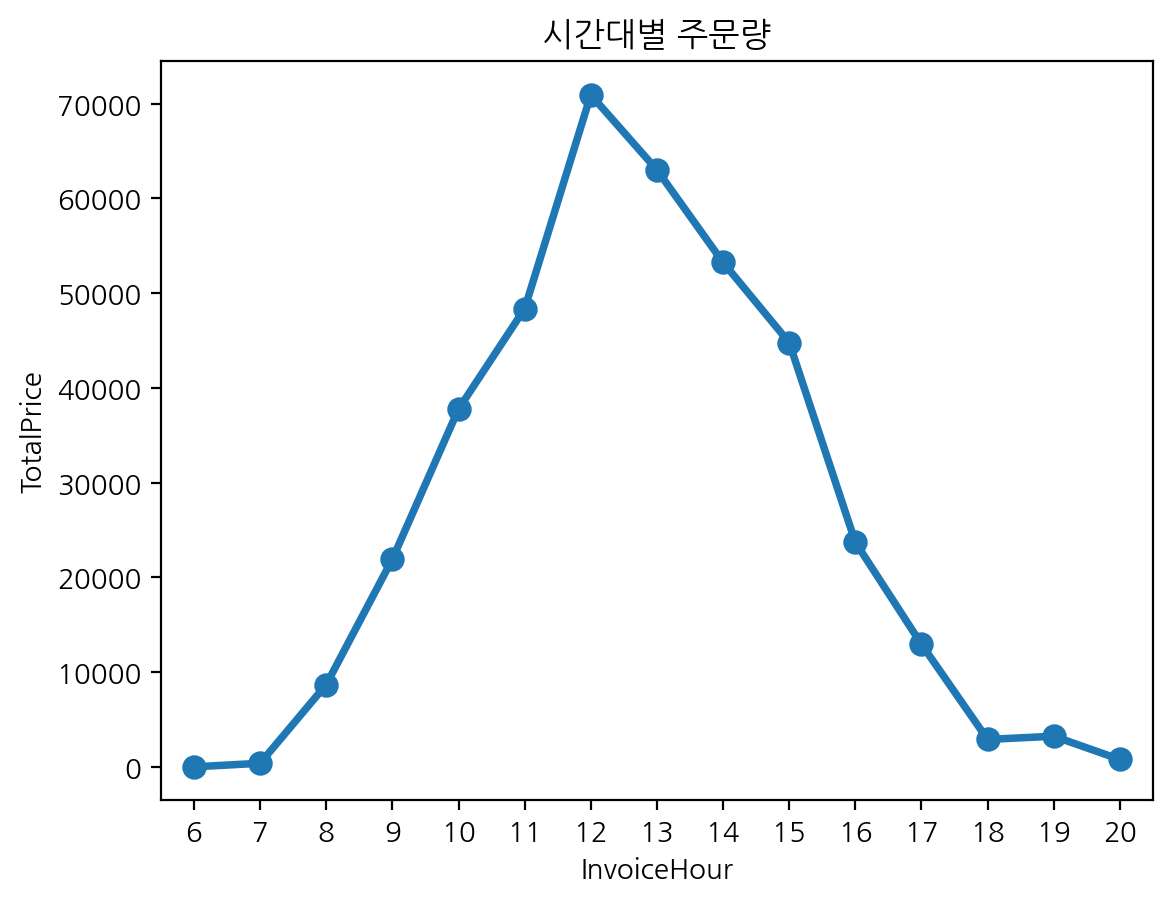

In [233]:
sns.pointplot(data=df_valid, x='InvoiceHour', y='TotalPrice', estimator=len,errorbar=None).set_title("시간대별 주문량")
#12시가 가장 많이 팔린다.

Text(0.5, 1.0, '시간대별 매출액')

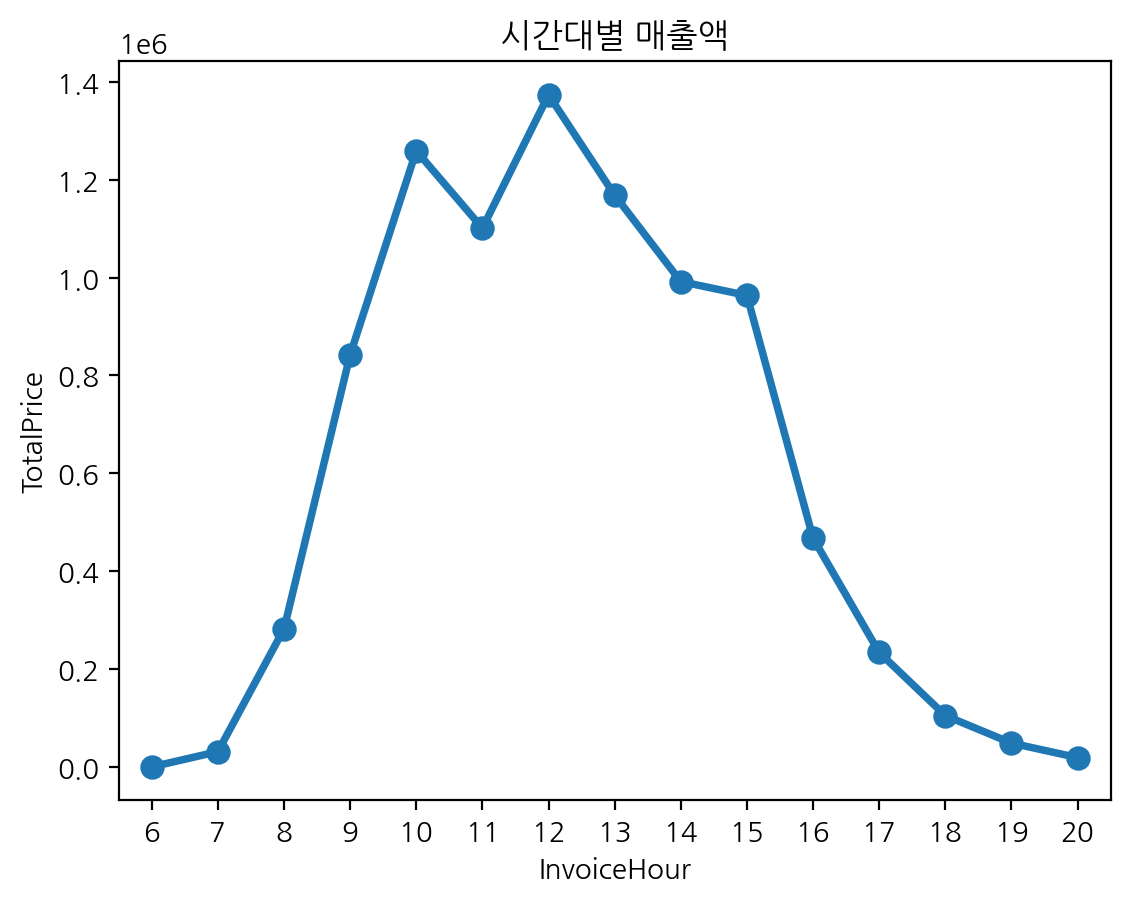

In [232]:
sns.pointplot(data=df_valid, x='InvoiceHour', y='TotalPrice', estimator="sum",errorbar=None).set_title("시간대별 매출액")
#12시가 가장 많이 팔린다.

### 시간-요일별 빈도수